In [ ]:
import numpy as np
import cv2
from google.colab import files
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image


In [ ]:
!pip install numpy
!pip install opencv-python
!pip install tensorflow
!pip install matplotlib


Upload the reference image:


Saving imran khan test .jpeg to imran khan test  (7).jpeg

Upload the test image:


Saving nawaz test.webp to nawaz test (2).webp
1/1 [==============================] - 1s 554ms/step
Similarity Score: 0.19
faces are not matched.


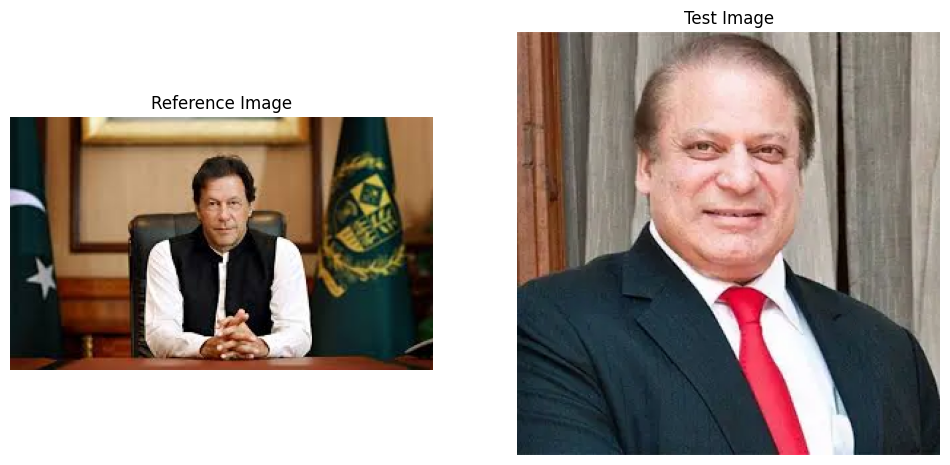

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load the VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define a function to extract features from an image using the VGG16 model
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = base_model.predict(img)
    return features.flatten()  # Flatten the features to a 1D array for comparison

# Define a function to perform face detection and matching using the extracted features
def detect_and_match_faces(reference_image_path, test_image_path):
    # Extract features from the reference and test images
    reference_features = extract_features(reference_image_path)
    test_features = extract_features(test_image_path)

    # Calculate the cosine similarity between the features
    similarity_score = np.dot(reference_features, test_features) / (np.linalg.norm(reference_features) * np.linalg.norm(test_features))

    # Print the similarity score (you can modify this to suit your needs)
    print(f"Similarity Score: {similarity_score:.2f}")

    # Determine if the images are matched based on the similarity score
    if similarity_score >= 0.8:  # Adjust the threshold as needed
        print("face are matched!")
    else:
        print("faces are not matched.")

    # Return the similarity score for further processing if needed
    return similarity_score

# Upload the reference image
print("Upload the reference image:")
uploaded_reference = files.upload()
reference_image_path = list(uploaded_reference.keys())[0]

# Upload the test image
print("\nUpload the test image:")
uploaded_test = files.upload()
test_image_path = list(uploaded_test.keys())[0]

# Perform face detection and matching
similarity_score = detect_and_match_faces(reference_image_path, test_image_path)

# Display the reference and test images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(cv2.imread(reference_image_path), cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Reference Image')
ax[1].imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Test Image')
plt.show()


Upload the reference image:


Saving imran khan test .jpeg to imran khan test  (24).jpeg

Upload the test image:


Saving imran 3.jpeg to imran 3 (12).jpeg
Similarity Score: 0.86
Faces are matched!


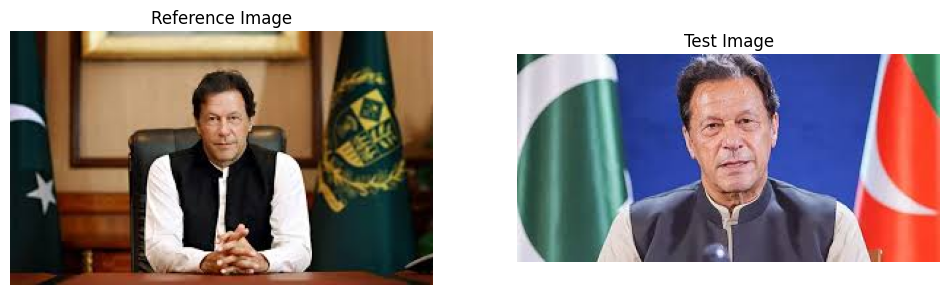

In [ ]:
import cv2
import numpy as np
from google.colab import files  # Assuming you're using Colab; adjust if needed
import matplotlib.pyplot as plt
import torch
from facenet_pytorch import InceptionResnetV1, MTCNN

# Load the FaceNet model for face recognition
device = 'cuda' if torch.cuda.is_available() else 'cpu'
face_recognition_model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Create an MTCNN face detection pipeline
face_detector = MTCNN(keep_all=True, device=device)

def extract_features_from_face(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes, _ = face_detector.detect(img_rgb)

    if boxes is not None:
        # Use the first detected face
        x, y, w, h = map(int, boxes[0])
        face_img = img_rgb[y:y+h, x:x+w]

        # Resize the face image to the required input shape for InceptionResnetV1
        face_img = cv2.resize(face_img, (160, 160))

        # Preprocess the image for InceptionResnetV1
        face_img = np.transpose(face_img, (2, 0, 1))
        face_img = torch.tensor(face_img, dtype=torch.float32).unsqueeze(0).to(device)

        # Extract features using FaceNet
        features = face_recognition_model(face_img).detach().cpu().numpy().flatten()
        return features
    else:
        print("Warning: No faces detected in the image.")
        return None

def detect_and_match_faces(reference_image_path, test_image_path):
    reference_features = extract_features_from_face(reference_image_path)
    test_features = extract_features_from_face(test_image_path)

    if reference_features is not None and test_features is not None:
        # Calculate the cosine similarity between the features
        similarity_score = np.dot(reference_features, test_features) / (np.linalg.norm(reference_features) * np.linalg.norm(test_features))
        print(f"Similarity Score: {similarity_score:.2f}")

        # Determine if the faces are matched based on the similarity score
        if similarity_score >= 0.8:  # Adjust the threshold as needed
            print("Faces are matched!")
        else:
            print("Faces are not matched.")
    else:
        print("Face detection failed for one or both images.")

    # Display the reference and test images (replace with your image display code)
    reference_img = cv2.imread(reference_image_path)
    test_img = cv2.imread(test_image_path)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
    plt.title('Reference Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.title('Test Image')
    plt.axis('off')

    plt.show()

# Upload the reference image
print("Upload the reference image:")
uploaded_reference = files.upload()
reference_image_path = list(uploaded_reference.keys())[0]

# Upload the test image
print("\nUpload the test image:")
uploaded_test = files.upload()
test_image_path = list(uploaded_test.keys())[0]

# Perform face detection and matching
detect_and_match_faces(reference_image_path, test_image_path)
